# Raw analytics - Social media User Analysis

analise dos dados brutos da camada bronze

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df_raw = pd.read_csv('dados_brutos.csv')

# Dados faltando ou vazios 

In [8]:
missing_values = pd.DataFrame({
    'coluna': df_raw.columns,
    'nulos': df_raw.isnull().sum(),
    'vazios': (df_raw == '').sum(),
    'total': df_raw.isnull().sum() + (df_raw == '').sum(),
    'percentual': (df_raw.isnull().sum() + (df_raw == '').sum()) / len(df_raw) * 100
})
if not missing_values.empty:
    print("Não foram encontrados valores ausentes.")
else:
    missing_values = missing_values.sort_values(by='percentual', ascending=False)
    missing_values

Não foram encontrados valores ausentes.


# Grafico de paises que mais usam a rede social instagram 

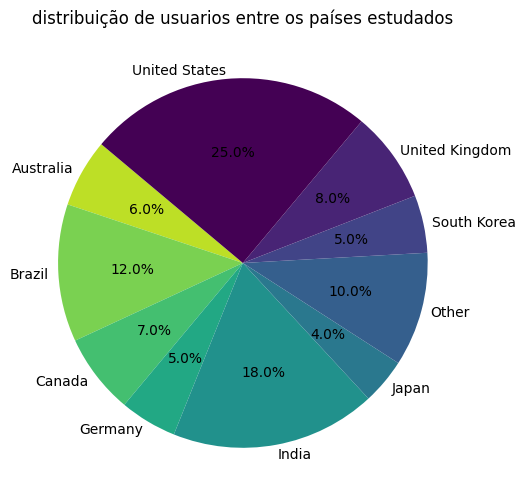

In [6]:
paises_count = df_raw.groupby('country').country.count()
plt.figure(figsize=(10,6))
plt.pie(paises_count, autopct='%1.1f%%', startangle=140,labels= paises_count.index,colors = plt.cm.viridis(np.linspace(0.9, 0, 10)), labeldistance=1.05)
plt.title('distribuição de usuarios entre os países estudados')
plt.show()

# Dados de relação entre idade dos usuarios e exercios fisico 

C:\Users\Windows\AppData\Local\Temp\ipykernel_12556\456150890.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exer_por_idd = df_raw.groupby('age_group')['exercise_hours_per_week'].mean()


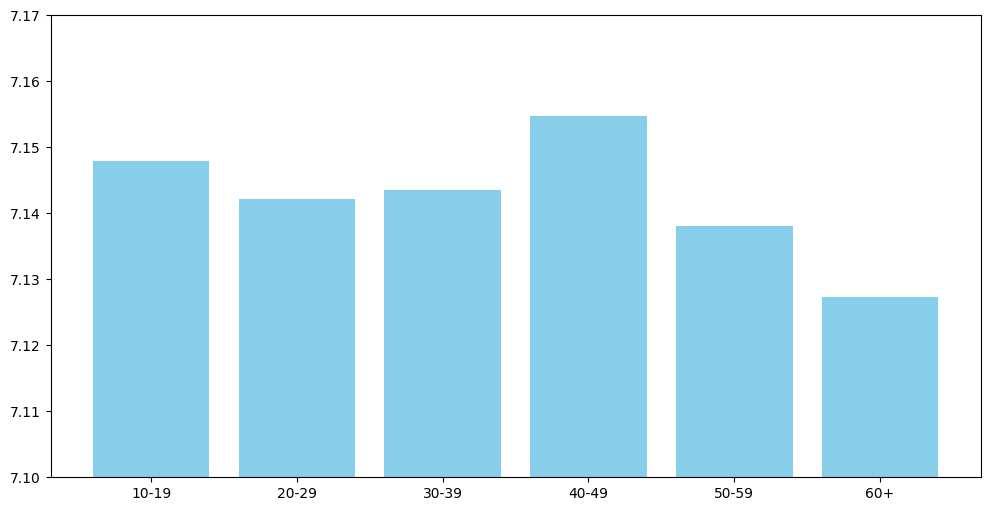

In [7]:
plt.figure(figsize=(12,6))
bins = [10,20,30,40,50,60,70]
labels = ['10-19','20-29','30-39','40-49','50-59','60+']
df_raw['age_group'] = pd.cut(df_raw['age'], bins=bins, labels=labels)
exer_por_idd = df_raw.groupby('age_group')['exercise_hours_per_week'].mean()
plt.bar(exer_por_idd.index,exer_por_idd.values, color='skyblue',)
plt.ylim(7.10,7.17)
plt.show()

In [8]:
max = df_raw.groupby('country')['exercise_hours_per_week'].max()
print(max)

country
Australia         22.6
Brazil            24.0
Canada            24.1
Germany           23.0
India             24.0
Japan             23.2
Other             24.0
South Korea       23.1
United Kingdom    23.2
United States     23.9
Name: exercise_hours_per_week, dtype: float64


# RELAÇÃO DE PAÍSES QUE MAIS FUMAM

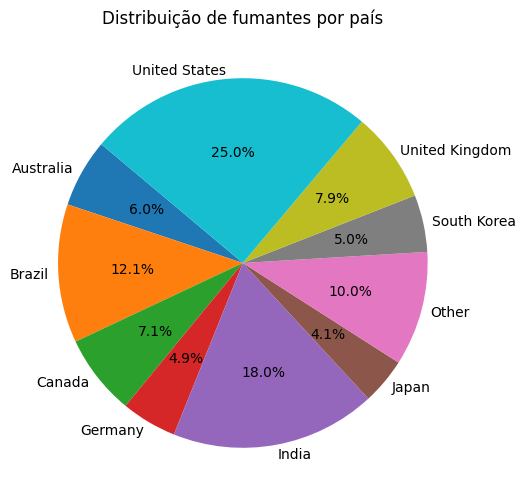

In [ ]:
df_fumantes = df_raw[df_raw['smoking'] == 'Yes']

fumantes_paises = df_fumantes.groupby('country').country.count()

plt.figure(figsize=(10, 6))
plt.pie(
    fumantes_paises,
    autopct='%1.1f%%',
    startangle=140,
    labels=fumantes_paises.index,
    labeldistance=1.05
)
plt.title('Distribuição de fumantes por país')
plt.show()



# Fumantes por faixa etária

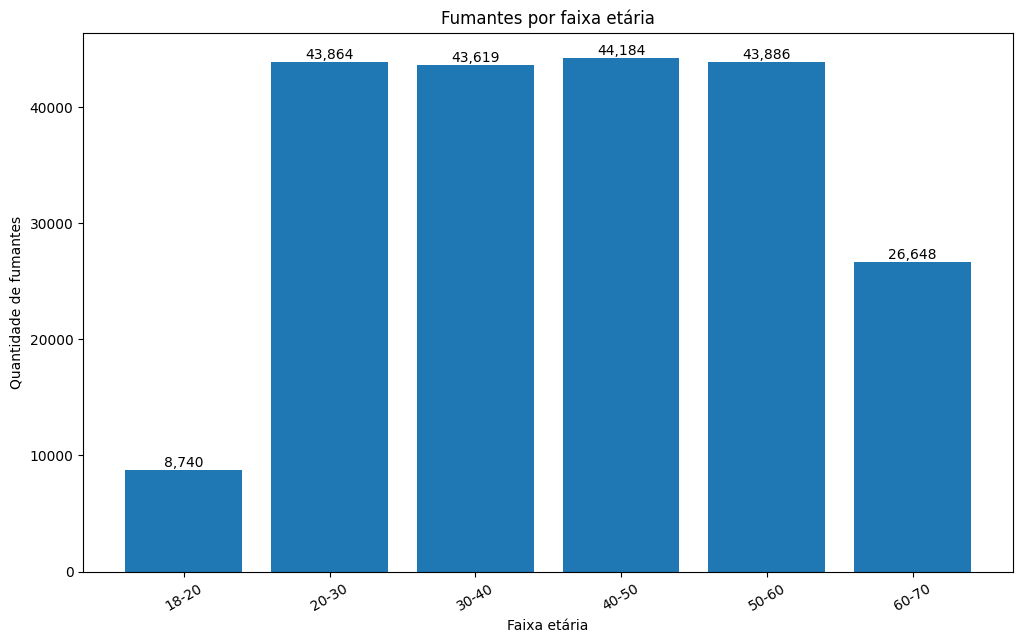

In [29]:
bins = [18, 20, 30, 40, 50, 60, 90]
labels = ['18-20', '20-30', '30-40', '40-50', '50-60', '60-70']

df_fumantes = df_raw.loc[df_raw['smoking'].str.lower() == 'yes'].copy()

df_fumantes['faixa_etaria'] = pd.cut(
    df_fumantes['age'],
    bins=bins,
    labels=labels,
    right=False
)

fumantes_idade = df_fumantes['faixa_etaria'].value_counts().sort_index()

plt.figure(figsize=(12, 7))
bars = plt.bar(fumantes_idade.index, fumantes_idade.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,}',
        ha='center',
        va='bottom'
    )

plt.title('Fumantes por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de fumantes')
plt.xticks(rotation=30)
plt.show()



# RELAÇÃO ENTRE OS TOP 5 PAÍSES QUE MAIS FUMAM E A FAIXA ETÁRIA

C:\Users\Windows\AppData\Local\Temp\ipykernel_12556\4277811088.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top = df_fumantes_sem_other[df_fumantes['country'].isin(top_paises)]


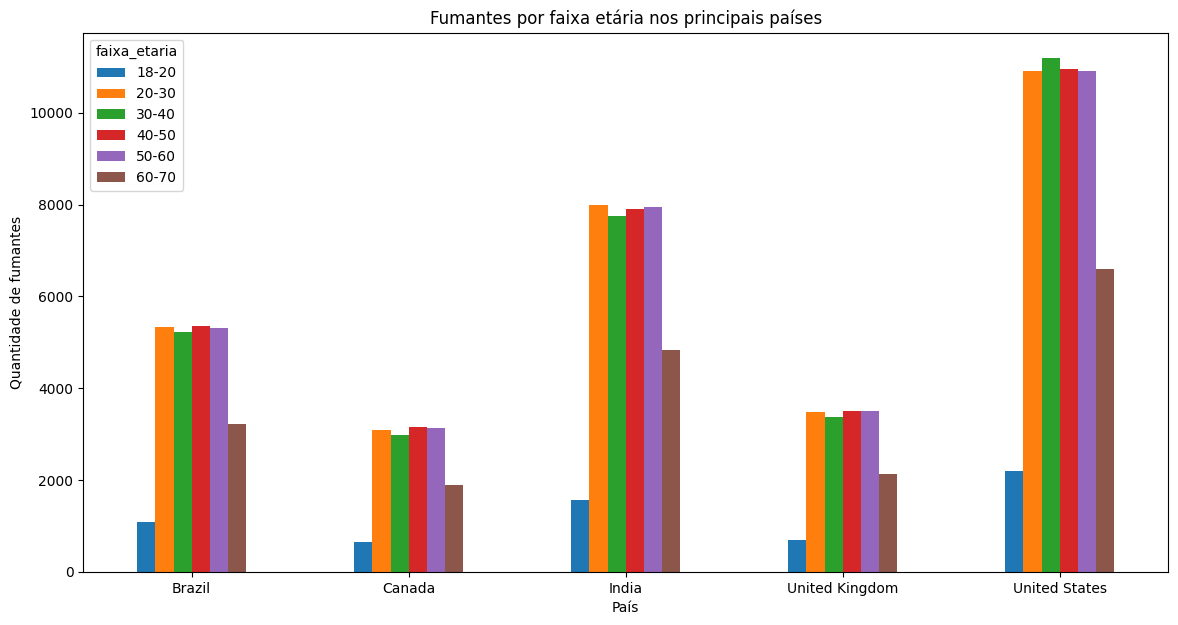

In [ ]:
df_fumantes_sem_other = df_fumantes[df_fumantes['country'] != 'Other']
tabela = pd.crosstab(df_fumantes['country'], df_fumantes['faixa_etaria'])
top_paises = df_fumantes_sem_other['country'].value_counts().head(5).index

df_top = df_fumantes_sem_other[
    df_fumantes_sem_other['country'].isin(top_paises)
]

tabela_top = pd.crosstab(df_top['country'], df_top['faixa_etaria'])

tabela_top.plot(kind='bar', figsize=(14, 7))
plt.title('Fumantes por faixa etária nos principais países')
plt.xlabel('País')
plt.ylabel('Quantidade de fumantes')
plt.xticks(rotation=0)
plt.show()



